In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
cfg = {
    'smog_tolerance': 45
}

In [82]:
xlsx = pd.read_excel('2016_PM2.5_1g.xlsx')
# last row is 2017
xlsx = xlsx[:-1]
xlsx

,1,2,3,4,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,42,43
NaN,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpToruDziewu,LbLubObywate,LdLodzCzerni,LdLodzGdansk,LdZgieMielcz,...,SkMalo11List,SkPolaRuszcz,SlGliwicMewy,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,WpPoznPolank,ZpSzczAndr01,ZpSzczPils02
NaN,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
NaN,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
NaN,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
Czas pomiaru,DsJelGorOgin-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpToruDziewu-PM2.5-1g,LbLubObywate-PM2.5-1g,LdLodzCzerni-PM2.5-1g,LdLodzGdansk-PM2.5-1g,LdZgieMielcz-PM2.5-1g,...,SkMalo11List-PM2.5-1g,SkPolaRuszcz-PM2.5-1g,SlGliwicMewy-PM2.5-1g,SlKatoKossut-PM2.5-1g,SlZlotPotLes-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpPoznPolank-PM2.5-1g,ZpSzczAndr01-PM2.5-1g,ZpSzczPils02-PM2.5-1g
2016-01-01 01:00:00,"21,0","311,827","233,76","235,9",NaN,NaN,"241,3834",NaN,NaN,NaN,...,"43,9","135,1","142,856","209,965","48,6769","58,5977","341,065","68,0","78,9016","77,6332"
2016-01-01 02:00:00,"23,856","154,281","81,7649",NaN,"176,9",NaN,"378,9304","87,465","125,0","110,0",...,"40,3","144,0","101,477","238,146","49,0558","91,1037","123,545","79,2165","190,152","151,912"
2016-01-01 03:00:00,"24,4845","95,6239","67,1229","81,4","68,6",NaN,"203,3238","63,798","65,0","56,0",...,"48,2","87,9","114,013","277,883","52,4854","33,6417","91,26","116,65","78,2346","39,3468"
2016-01-01 04:00:00,"29,6","71,4168","61,2146",NaN,"58,4",NaN,"112,0202","62,769","68,0","49,0",...,"51,0","86,5","96,9653","271,435","50,9501","30,7289","88,4145","115,133","42,1986","33,441"
2016-01-01 05:00:00,"25,5768","53,9496","54,6931","63,9","54,6",NaN,"85,4968","65,856","65,0","43,0",...,"53,6","94,6","82,7186","172,066","56,2641","31,519","83,4373","110,07","28,9183","37,0143"


In [83]:
df = pd.DataFrame(xlsx.iloc[5:,:].values, columns=xlsx.iloc[0,:].values, index=xlsx.index[5:])\
    .apply(lambda x: x.str.replace(',','.'))\
    .astype('float32')
# target = ['MpKrak', 'PmGda', 'MzWar', 'WpPoz']
target = ['MpKrakBujaka', 'MzWarAlNiepo', 'PmGdaLeczk08', 'WpPoznPolank']
target_columns = filter(lambda loc: any(t in loc for t in target), list(df.columns.values))
df[target_columns]

df.index = pd.to_datetime(df.index)

# drop measurements between 2am - 5am, nobody walks at this time
df[df.index.map(lambda ix: ix.hour <= 2 or ix.hour >= 6).values]

,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpToruDziewu,LbLubObywate,LdLodzCzerni,LdLodzGdansk,LdZgieMielcz,...,SkMalo11List,SkPolaRuszcz,SlGliwicMewy,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,WpPoznPolank,ZpSzczAndr01,ZpSzczPils02
2016-01-01 01:00:00,21.000000,311.826996,233.759995,235.899994,NaN,NaN,241.383408,NaN,NaN,NaN,...,43.900002,135.100006,142.856003,209.964996,48.676899,58.597698,341.065002,68.000000,78.901604,77.633202
2016-01-01 02:00:00,23.856001,154.281006,81.764900,NaN,176.899994,NaN,378.930389,87.464996,125.0,110.0,...,40.299999,144.000000,101.476997,238.145996,49.055801,91.103699,123.544998,79.216499,190.151993,151.912003
2016-01-01 06:00:00,22.684401,55.705101,56.712700,NaN,53.799999,NaN,53.747601,66.885002,65.0,44.0,...,52.299999,75.900002,62.455898,156.791000,48.836399,33.341301,68.914497,106.898003,39.779598,36.865501
2016-01-01 07:00:00,22.749201,59.864300,52.407200,59.299999,54.000000,NaN,27.520000,72.029999,69.0,39.0,...,47.799999,26.200001,59.759201,154.186005,55.376701,34.330799,67.637299,96.309998,35.933800,33.180302
2016-01-01 08:00:00,26.210300,60.007401,64.754204,NaN,59.000000,NaN,25.646601,74.087997,70.0,45.0,...,52.400002,23.799999,50.622799,107.070999,67.081497,32.584999,71.667801,93.686302,32.386002,35.871601
2016-01-01 09:00:00,26.398600,64.382004,69.976700,61.900002,66.500000,NaN,26.435400,71.000999,75.0,49.0,...,75.300003,24.500000,65.372200,275.515015,37.420799,29.329700,71.679100,84.930000,35.192902,38.452599
2016-01-01 10:00:00,29.652100,71.701797,77.819702,NaN,72.400002,NaN,29.787800,83.348999,87.0,51.0,...,67.199997,60.099998,73.228600,244.233002,34.100700,24.249701,55.839100,84.941498,43.163399,43.476799
2016-01-01 11:00:00,50.452000,63.069698,86.853699,76.800003,96.599998,NaN,33.140202,89.523003,87.0,57.0,...,57.400002,86.199997,58.743301,171.371994,33.741798,21.825899,55.478199,84.300003,40.998199,54.455502
2016-01-01 12:00:00,68.854202,74.471603,95.837997,NaN,94.199997,NaN,23.378799,76.146004,82.0,57.0,...,57.799999,91.800003,59.112999,125.045998,43.681900,19.893900,59.181801,84.900002,48.819000,57.898602
2016-01-01 13:00:00,116.889999,76.983597,83.916000,81.199997,94.900002,NaN,21.604000,61.740002,75.0,47.0,...,56.599998,58.099998,55.057800,113.753998,51.179401,24.262300,66.103600,NaN,44.287899,63.903999


# Daily Max

In [84]:
# pd.to_datetime(df.index)
from datetime import datetime
max_day = df.groupby(lambda x: datetime(x.year, x.month, x.day)).max()
max_day[target_columns]

,MpKrakBujaka,MzWarAlNiepo,PmGdaLeczk08,WpPoznPolank
2016-01-01,316.500000,87.681015,98.423103,116.650002
2016-01-02,57.500000,31.020954,12.721700,86.216103
2016-01-03,75.699997,NaN,24.501101,45.123001
2016-01-04,94.508499,55.334042,36.169998,70.930000
2016-01-05,182.416000,106.285812,63.087200,95.610001
2016-01-06,178.815994,91.909378,73.902802,109.809998
2016-01-07,117.310997,69.604767,33.891701,97.245003
2016-01-08,82.907501,74.678802,54.711399,84.900002
2016-01-09,124.411003,66.116364,85.262497,40.830002
2016-01-10,85.207703,71.507530,47.770802,116.379997


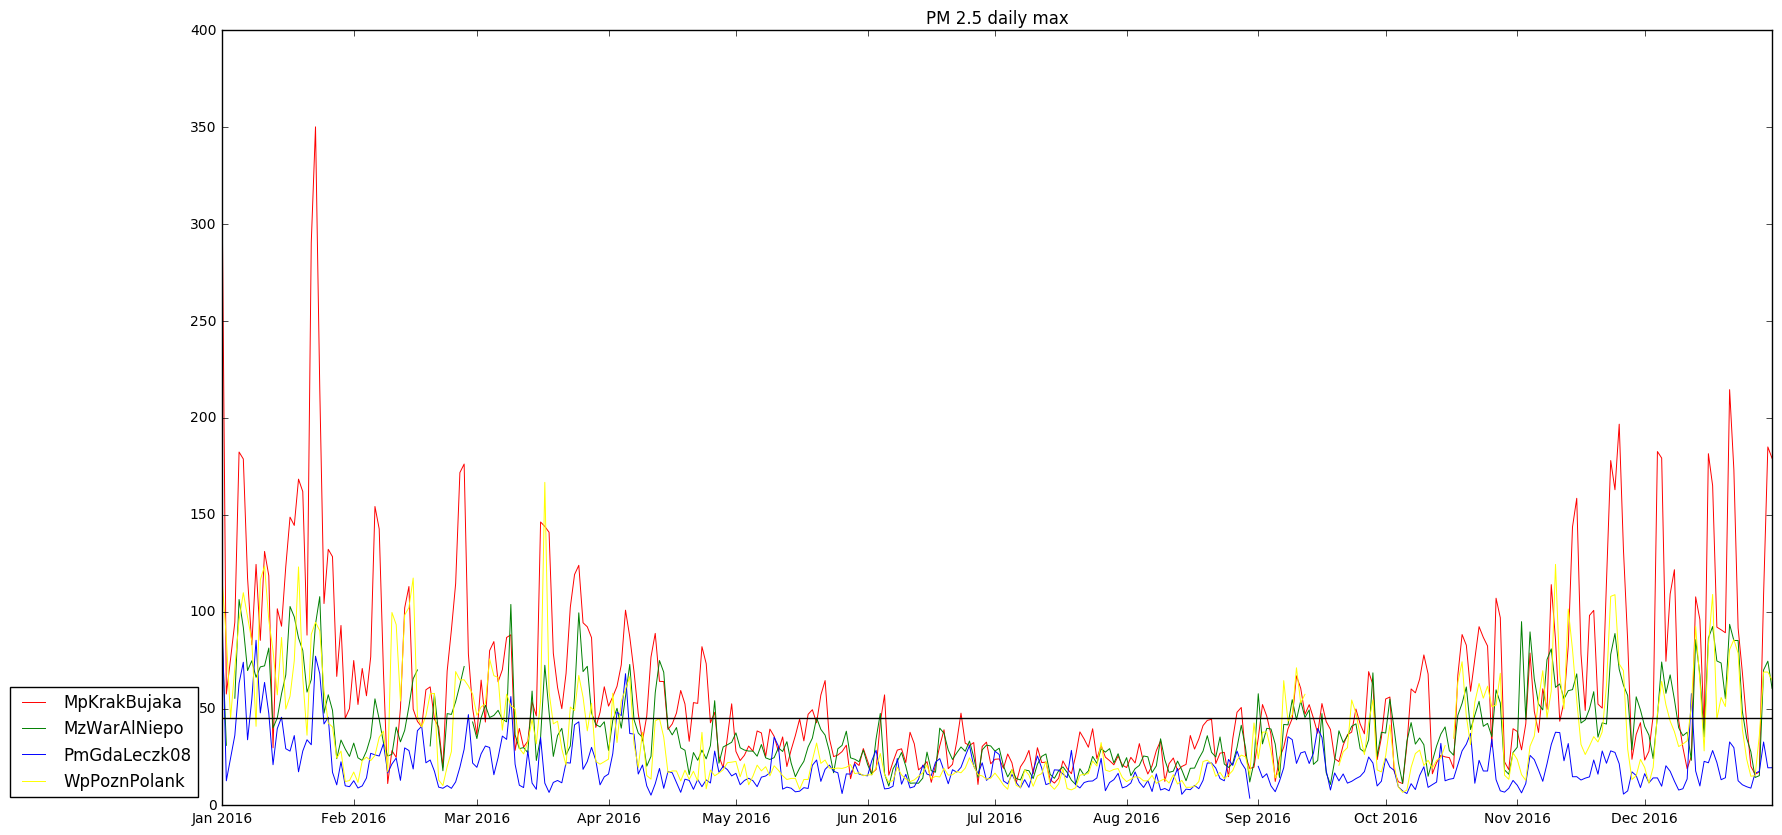

In [85]:
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

def plot(first_perc, last_perc, df, series):    
    plt.figure(figsize=(20,10))
    first = int(len(max_day) * first_perc)
    last = int(len(max_day) * last_perc)
    x = df.index.values[first:last]
    for (name, color) in series:
        y = df[name].iloc[first:last].values
        plt.plot_date(x=x, y=y, fmt="r-", linewidth=0.7, c=color, label=name)
    plt.title("PM 2.5 daily max")
    plt.axhline(y=cfg['smog_tolerance'], color='black', linestyle='-')    
    plt.legend(bbox_to_anchor=(-0.01,0), loc="lower right")
    plt.show()
    
plot(0, 1.0, max_day, [
        ('MpKrakBujaka', 'red'),
        ('MzWarAlNiepo', 'green'),
        ('PmGdaLeczk08', 'blue'),
        ('WpPoznPolank', 'yellow')
    ])

# Dangerous hours percentage per month

In [86]:
danger_hours_per_month = df[target_columns].apply(lambda x: x > cfg['smog_tolerance']).groupby(lambda x: datetime(x.year, x.month, 1))
danger_hours_per_month = danger_hours_per_month.sum() / danger_hours_per_month.count() * 100
danger_hours_per_month[target_columns]

,MpKrakBujaka,MzWarAlNiepo,PmGdaLeczk08,WpPoznPolank
2016-01-01,59.353970,43.068641,8.748318,42.530283
2016-02-01,18.965517,10.344828,0.143678,18.821839
2016-03-01,21.774194,12.365591,0.268817,20.967742
2016-04-01,18.194444,7.638889,1.388889,5.277778
2016-05-01,1.075269,0.134409,0.000000,0.000000
2016-06-01,0.416667,0.138889,0.000000,0.000000
2016-07-01,0.000000,0.000000,0.000000,0.000000
2016-08-01,0.403226,0.000000,0.000000,0.000000
2016-09-01,3.472222,4.861111,0.000000,6.805556
2016-10-01,12.634409,8.333333,0.000000,9.811828


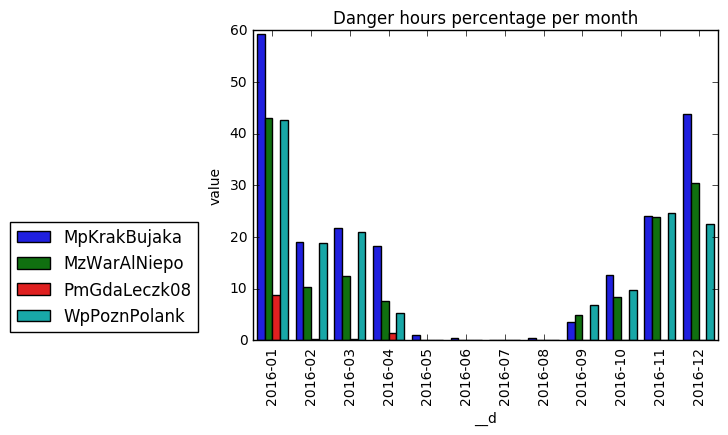

In [87]:
def bar_grouped(df, title=None):
    clone = df.copy()
    clone['__d'] = clone.index.strftime('%Y-%m')    
    melted = pd.melt(clone, id_vars=['__d'])
    sns.barplot(x='__d', y='value', hue='variable', data=melted)
    plt.legend(bbox_to_anchor=(-0.1,0), loc="lower right")
    plt.xticks(rotation=90)
    if (title):
        plt.title(title)

bar_grouped(danger_hours_per_month[target_columns], title="Danger hours percentage per month")

# Dangerous day max percentage per month

In [88]:
days_with_dangerous_max = max_day.apply(lambda x: x > cfg['smog_tolerance']).groupby(lambda x: datetime(x.year, x.month, 1))
days_with_dangerous_max = days_with_dangerous_max.sum() / days_with_dangerous_max.count() * 100
days_with_dangerous_max[target_columns]

,MpKrakBujaka,MzWarAlNiepo,PmGdaLeczk08,WpPoznPolank
2016-01-01,96.774194,77.419355,38.709677,74.193548
2016-02-01,72.413793,34.482759,3.448276,51.724138
2016-03-01,77.419355,45.161290,3.225806,54.838710
2016-04-01,73.333333,23.333333,10.000000,13.333333
2016-05-01,12.903226,3.225806,0.000000,0.000000
2016-06-01,6.666667,3.333333,0.000000,0.000000
2016-07-01,0.000000,0.000000,0.000000,0.000000
2016-08-01,6.451613,0.000000,0.000000,0.000000
2016-09-01,36.666667,23.333333,0.000000,26.666667
2016-10-01,54.838710,25.806452,0.000000,32.258065


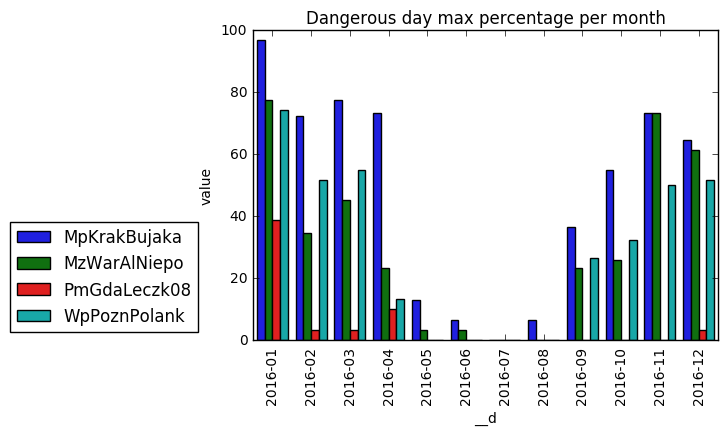

In [89]:
bar_grouped(days_with_dangerous_max[target_columns], title='Dangerous day max percentage per month')